# Jordan Notebook - EDA

- Author: [Jordan](https://github.com/JfromNWMS/)
- Repository: [datafun-04-eda](https://github.com/JfromNWMS/datafun-04-eda)

### Section 1. Imports

In [1422]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from pingouin import qqplot
import utils_jordan

### Section 2. Load Data

In [1423]:
iris_df: pd.DataFrame = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Section 3. Initial Data Inspection

In [1424]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Section 4. Initial Descriptive Statistics

In [1425]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1426]:
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Section 5.  Initial Data Distribution for Numerical Columns

In [ ]:
import ipywidgets as widgets
from IPython.display import display

iris_df = jmod.pretty_df(iris_df)

def plot_species(name):
    colors = ['cadetblue', 'steelblue', 'lightslategrey']
    index = list(iris_df['Species'].unique()).index(name)
    iris_df.query(f"Species=='{name}'").hist(layout=(1,4), figsize=(20,4), color=colors[index])
    plt.suptitle(f"Species: {name.title()}", fontsize=18)
    plt.tight_layout()
    plt.show()

species_dropdown = widgets.Dropdown(
    options=list(iris_df['Species'].unique()),
    description='Species:',
    disabled=False,
)

species_slider = widgets.SelectionSlider(
    options=list(iris_df['Species'].unique()),
    description='Species:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

out = widgets.interactive_output(plot_species, {'name': species_slider})
display(species_slider, out)


SelectionSlider(continuous_update=False, description='Species:', options=('Setosa', 'Versicolor', 'Virginica')…

Output()

Inspection of the histograms of the four groups reveals that the sepal_length and sepal_width appears to roughly follow a normal distribution with width showing a stronger tendancy.  The distribution of petal_length measurements also has a normal trend for the larger petal lengths though there is a high frequency for very small petal lengths.  The histogram of petal_width shows a high frequency for very small widths and a decreasing tend in frequency as petal_width increases.

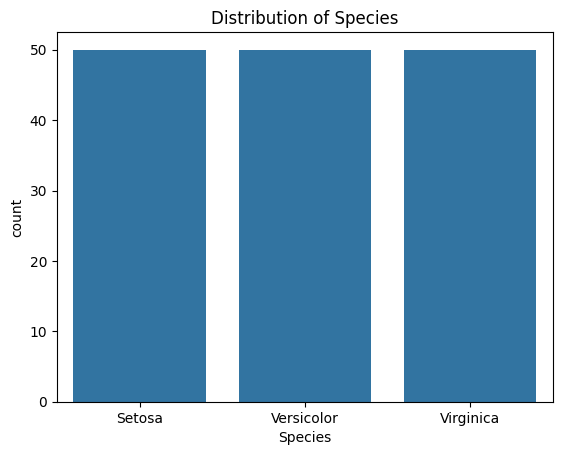

In [1429]:
iris_df['Species'].value_counts()

for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=iris_df)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.show()

Inspection of the frequency distribution plot for flower species shows that all three species of flowers each have fifty observations.

### Section 6. Initial Data Transformation and Feature Engineering

In [ ]:
iris_df.insert(0, 'sepal_area', iris_df['sepal_length'] * iris_df['sepal_width'])
iris_df = utils_jordan.pretty_df(iris_df)
iris_df.head()


,Sepal Area,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,17.85,5.1,3.5,1.4,0.2,Setosa
1,14.70,4.9,3.0,1.4,0.2,Setosa
2,15.04,4.7,3.2,1.3,0.2,Setosa
3,14.26,4.6,3.1,1.5,0.2,Setosa
4,18.00,5.0,3.6,1.4,0.2,Setosa


### Section 7. Initial Visualizations

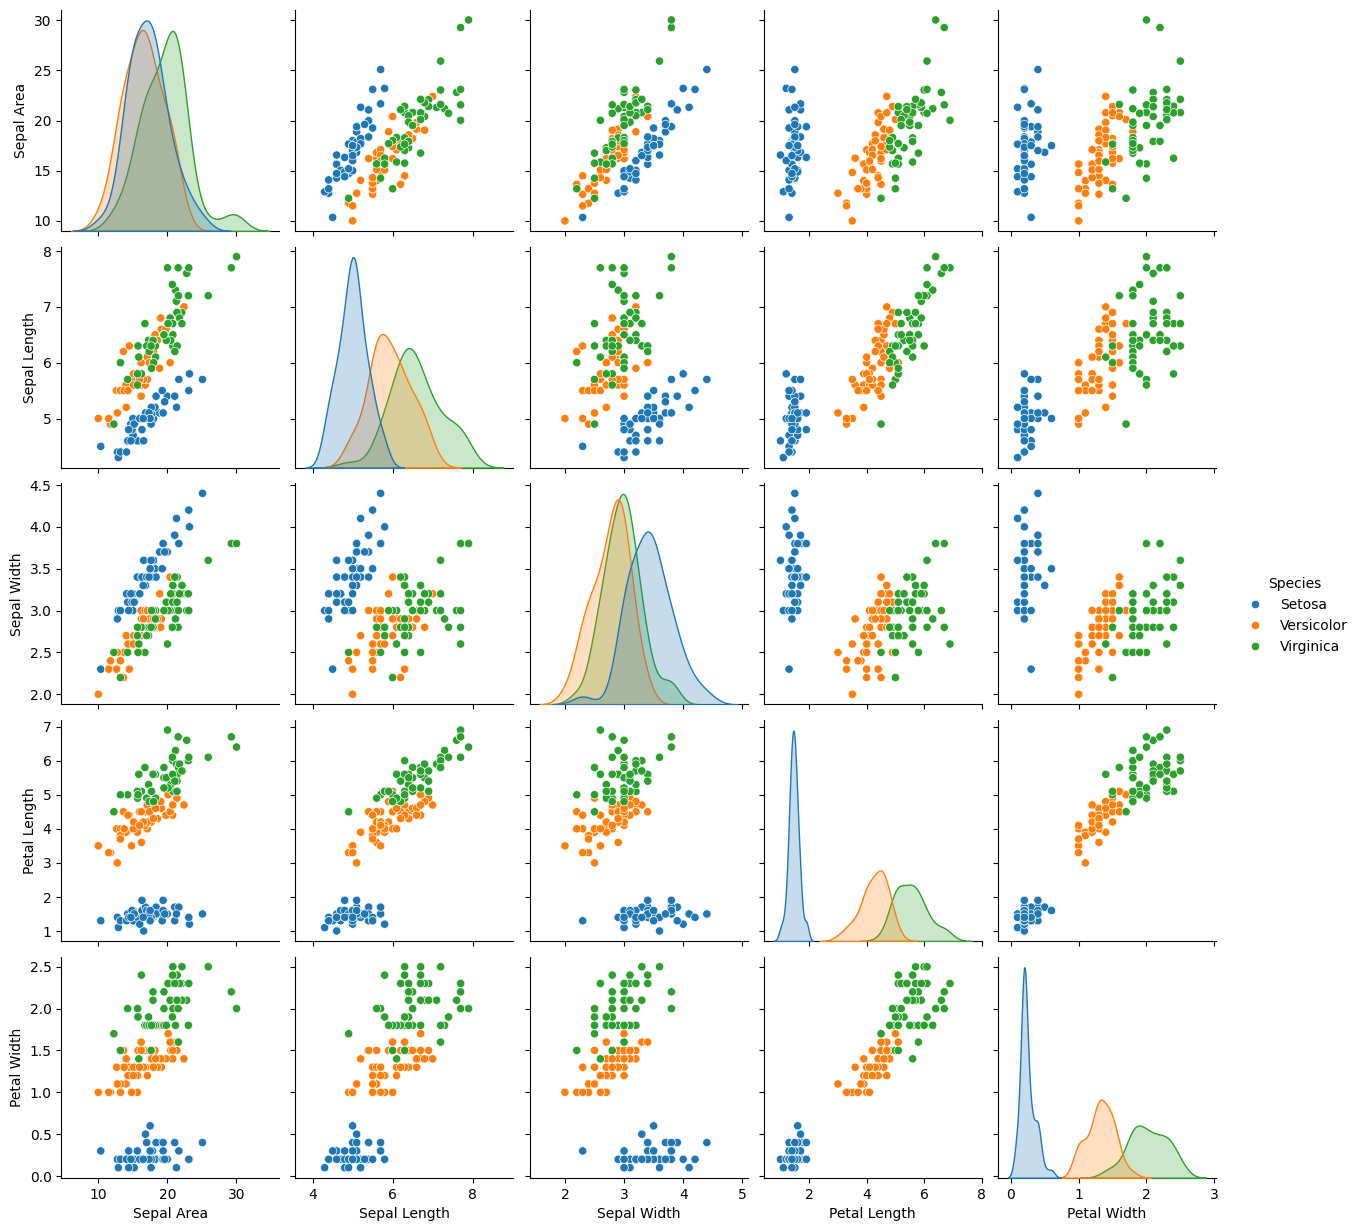

In [ ]:
sns.pairplot(iris_df, hue='Species')
plt.show()

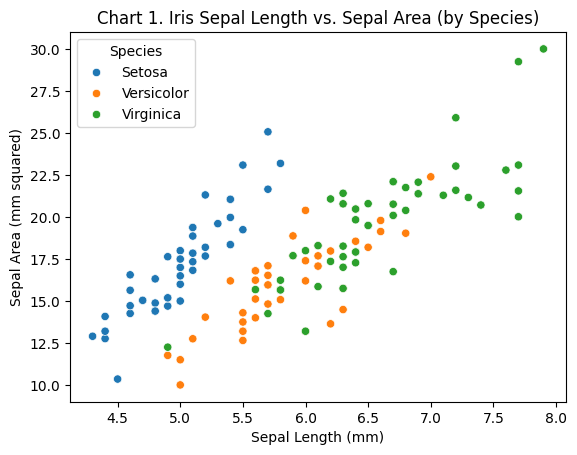

In [ ]:
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="Species"
)

scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

plt.show()

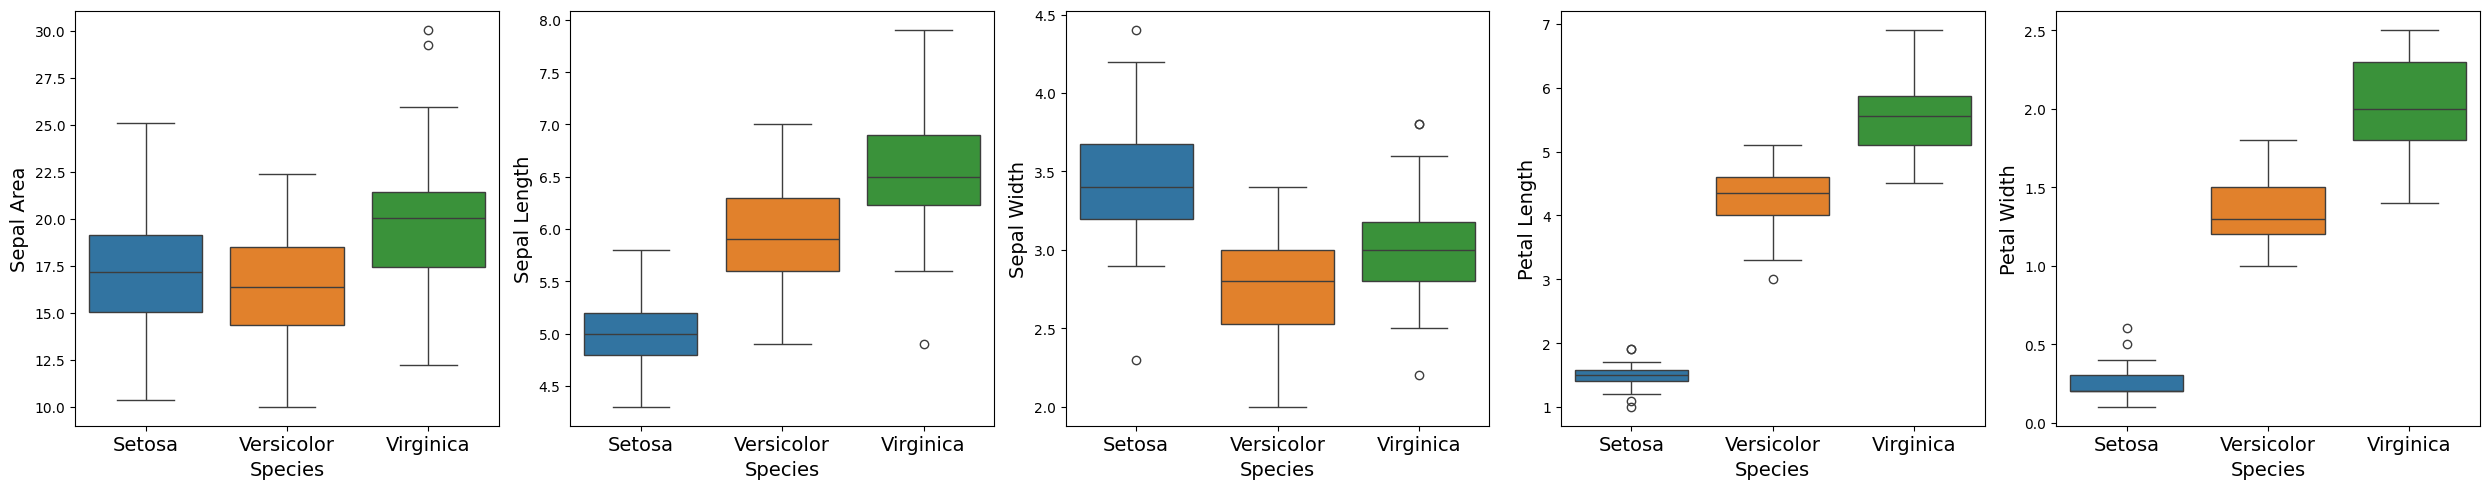

In [ ]:
from importlib import reload
reload(utils_jordan)

utils_jordan.multi_boxplot(iris_df, 'Species')

0


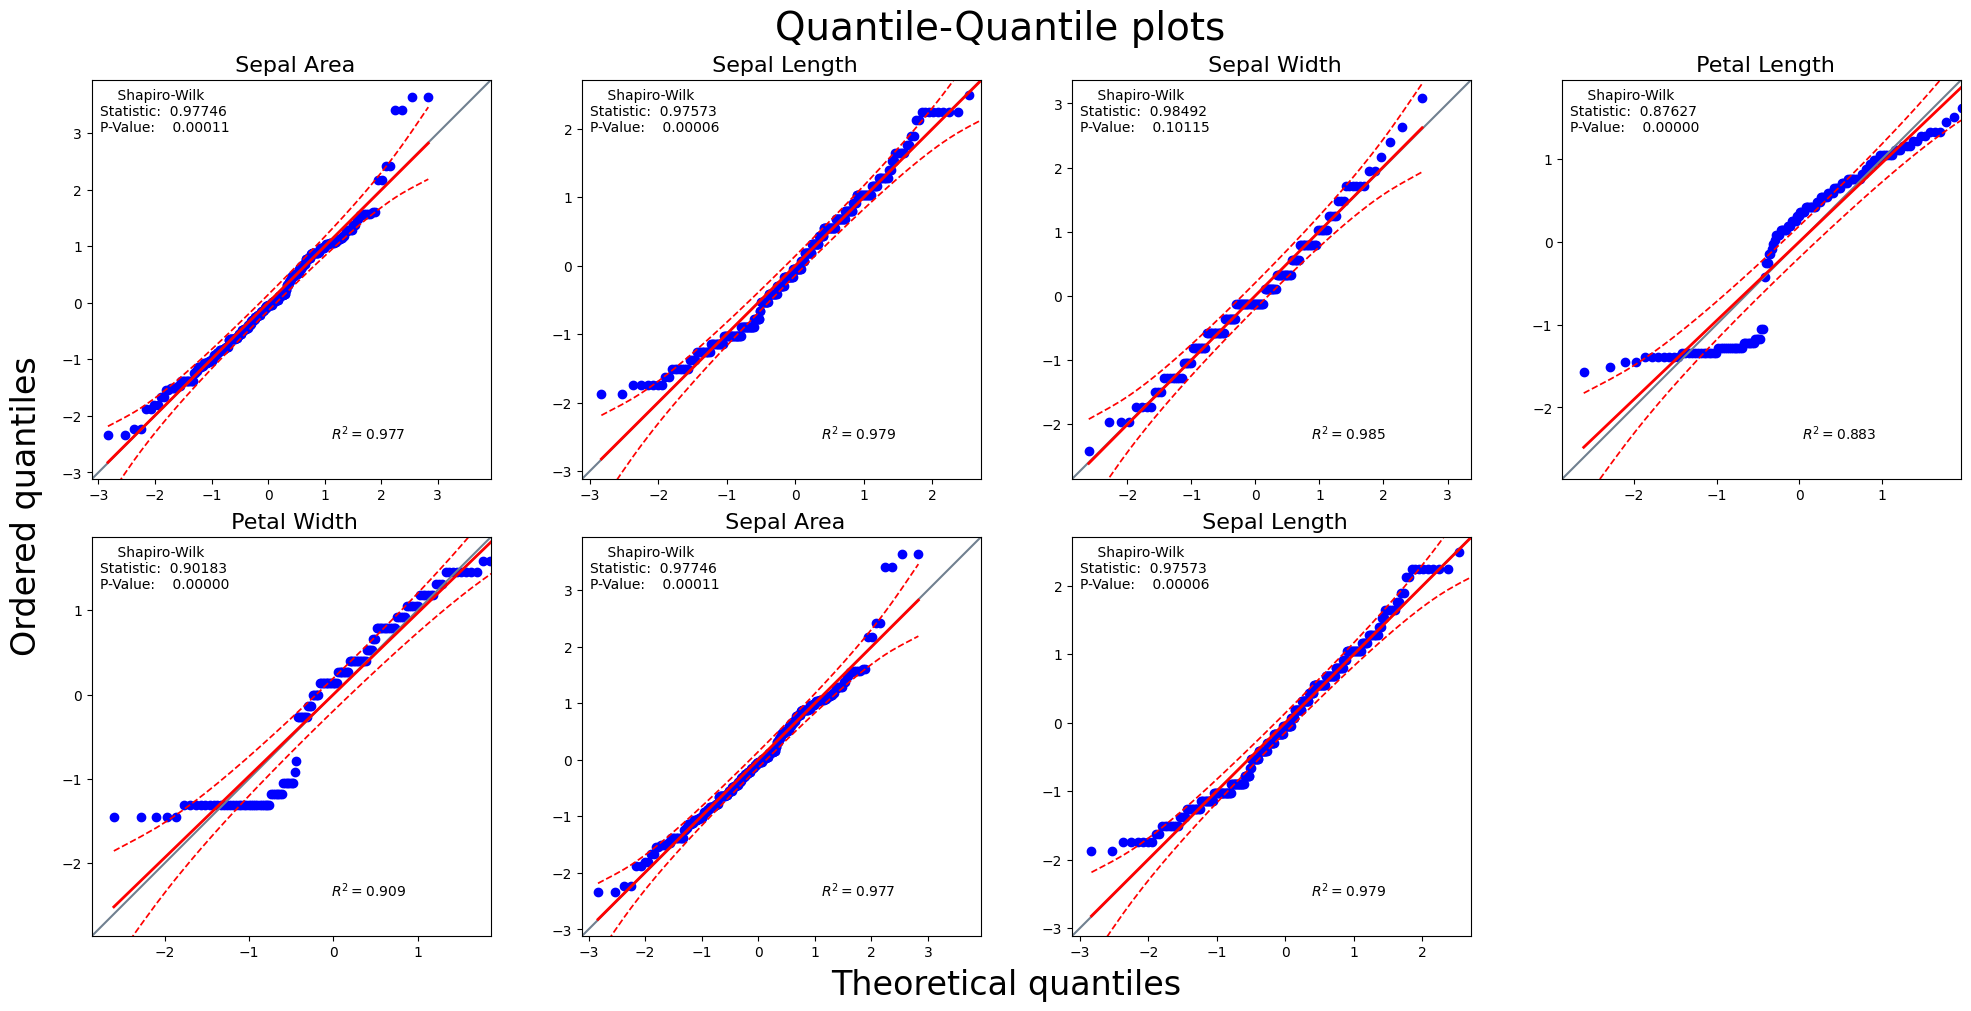

In [ ]:
reload(utils_jordan)
iris_ns = iris_df.drop('Species', axis=1)
#jmod.is_norm(iris_df.drop('species', axis=1))

test_df = pd.concat([iris_ns, iris_ns.iloc[:,0:2]], axis=1)
utils_jordan.is_norm(test_df)

2


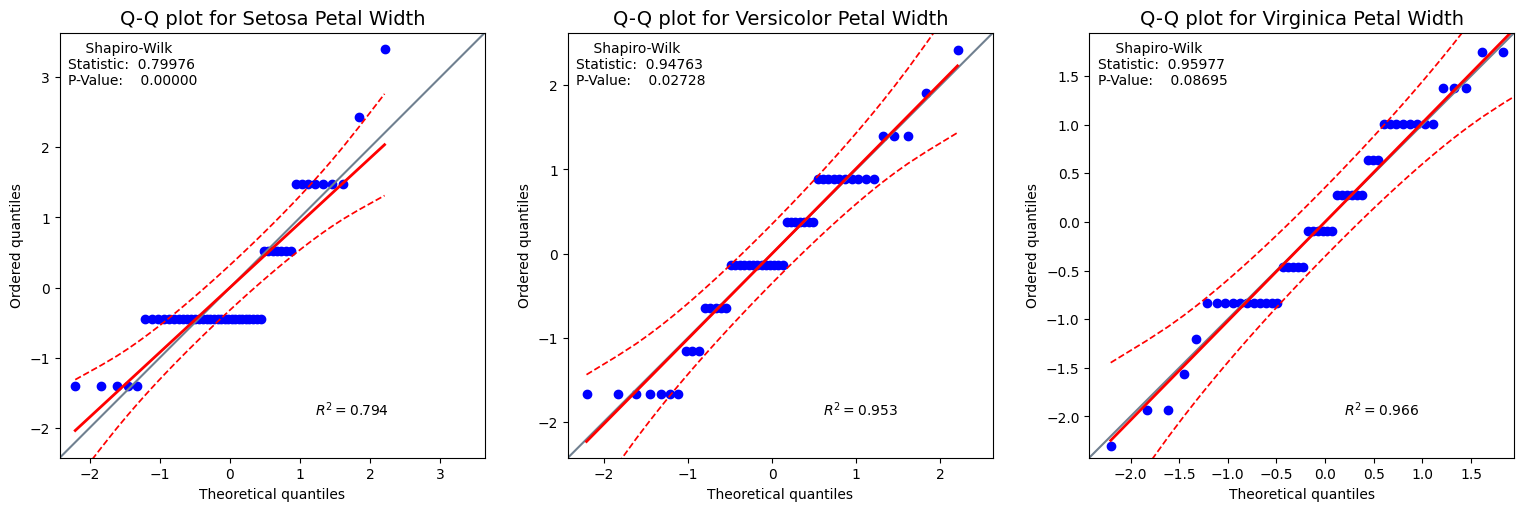

In [ ]:
reload(utils_jordan)
utils_jordan.is_norm(df_data=iris_df.iloc[:,-2:], by='Species', main_label=False)


2


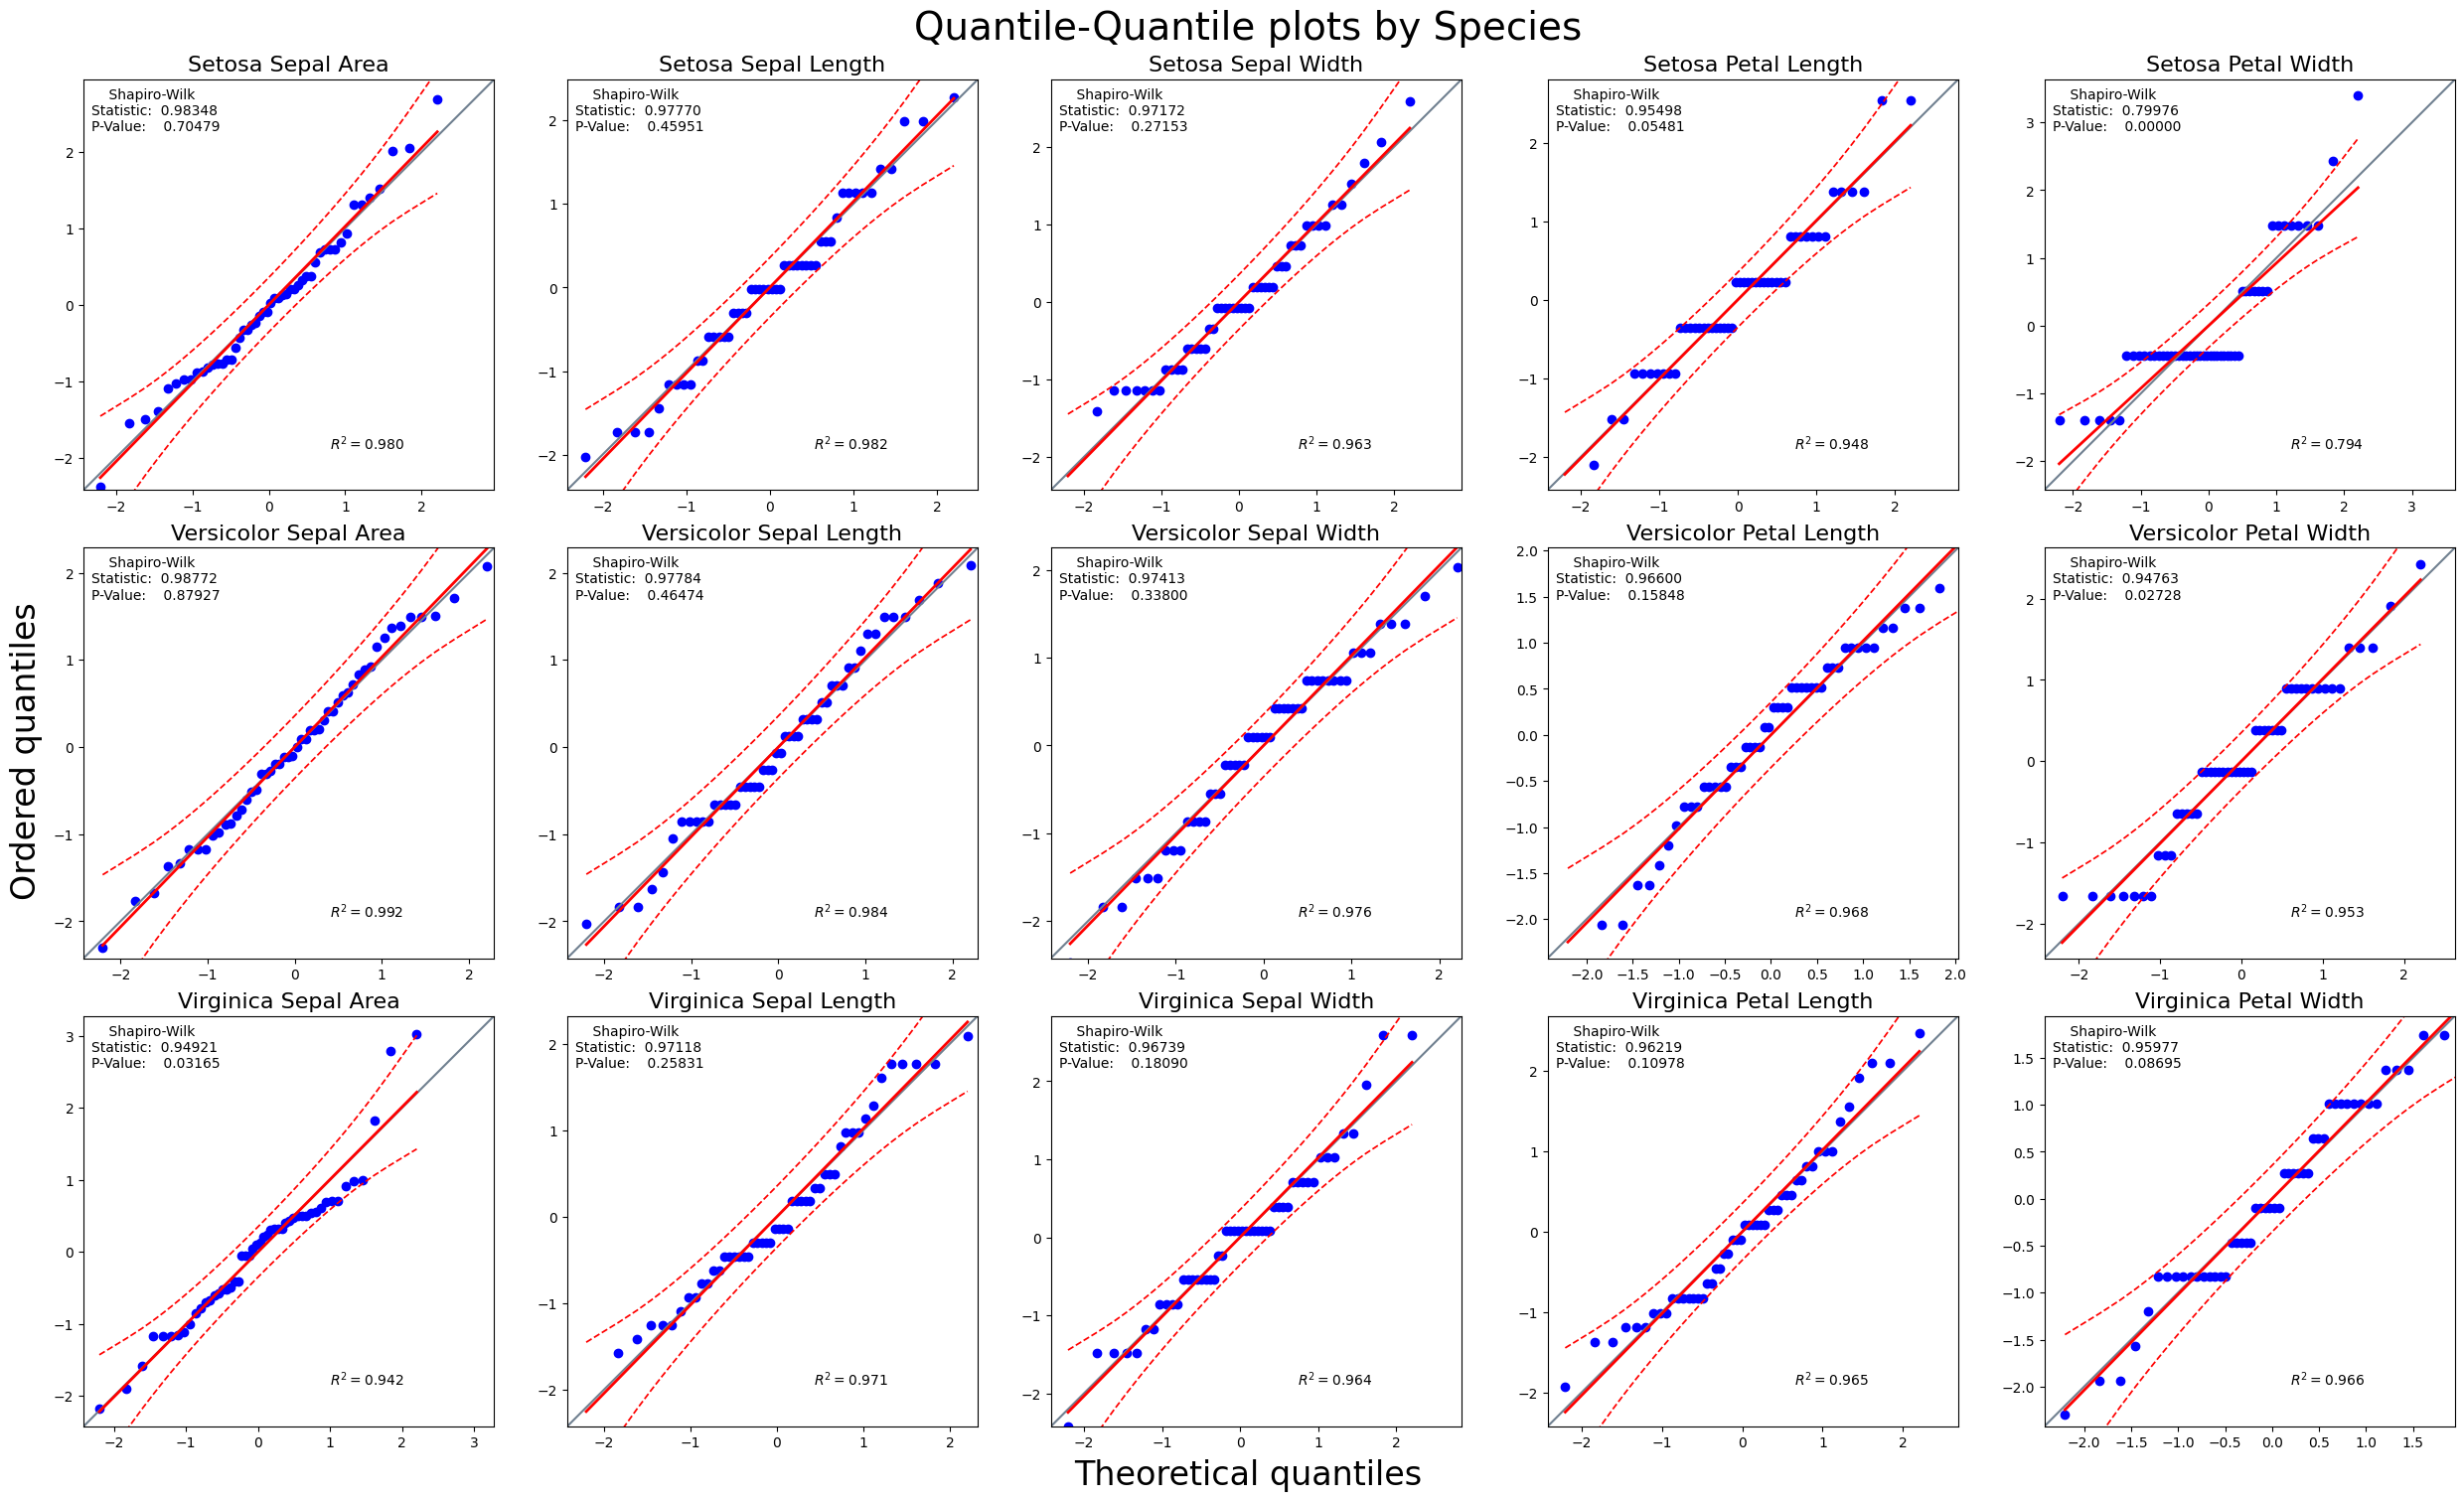

In [ ]:
reload(utils_jordan)
utils_jordan.is_norm(iris_df, 'Species', ncol_fig=5)

2


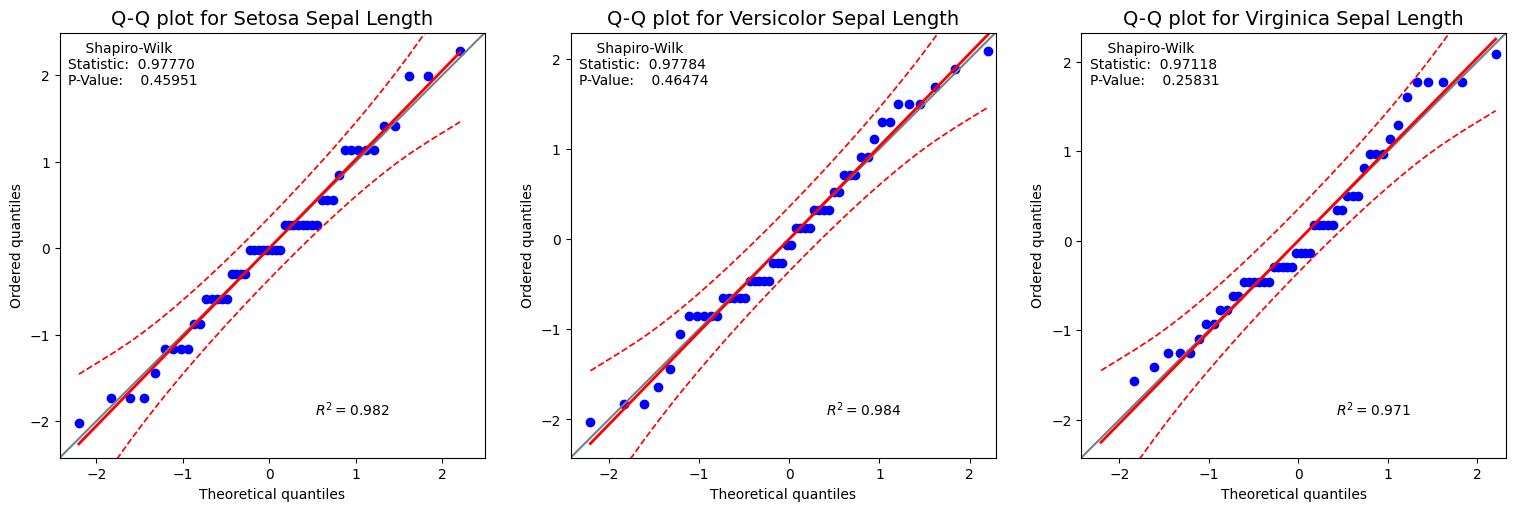

In [ ]:
reload(utils_jordan)
utils_jordan.is_norm(iris_df[['Species','Sepal Length']], by='Species', main_label=False)